In [17]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import StringIO
import requests
import zipfile
%pylab inline

if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2016")

import os
import json
#s = json.load( open(os.getenv('PUI2016') + "/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)

Populating the interactive namespace from numpy and matplotlib


In [18]:
#This function is written by xinshi zheng#
def getcitiDatacsv(datestring):
    zip_file_url = "https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip"
    r = requests.get(zip_file_url, stream=True)
    z = zipfile.ZipFile(StringIO.StringIO(r.content))
    z.extractall()

In [161]:
df=getcitiDatacsv(str(201502))

In [162]:
df=pd.read_csv("201502"+"-citibike-tripdata.csv")
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978.0,2
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993.0,1
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969.0,2
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985.0,2
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957.0,1


In [163]:
df=df[['tripduration','birth year']]
df['birth year']=2016-df['birth year']
df.columns=['tripduration','age']
df.head()

,tripduration,age
0,801,38.0
1,379,23.0
2,2474,47.0
3,818,31.0
4,544,59.0


In [164]:
age_range =([0, 20, 40, 60, 80, 100])
type(age_range)

list

In [165]:
df['age'] = pd.cut(df['age'], bins=age_range)
df.columns=['tripduration','age_range']

In [166]:
df.head()

,tripduration,age_range
0,801,"(20, 40]"
1,379,"(20, 40]"
2,2474,"(40, 60]"
3,818,"(20, 40]"
4,544,"(40, 60]"


In [167]:
df_agerange_mean = df.groupby(df.age_range).mean

In [217]:
mean_duration=np.array([0.0,0.0,0.0,0.0,0.0])
for i in range (0,4):
    mean_duration[i]=df.loc[df['age_range'] == "(%s, %s]" %(20*i,20*i+20), 'tripduration'].mean()

In [218]:
mean_duration

array([ 679.21681781,  605.19310795,  670.17593971,  742.6476097 ,    0.        ])

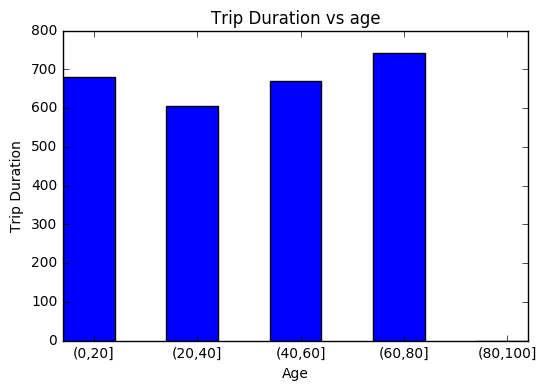

In [219]:
import plotly.plotly as py
import plotly.graph_objs as go


import numpy as np
import matplotlib.pyplot as plt
import datetime
width=0.3
ind=np.arange(5)
x = np.arange(5)
y = mean_duration
ax = plt.subplot(111)
ax.bar(x, y, width=0.5)
#'(0,20]','(20,40]','(40,60]','(60,80]','(80,20]"]
ax.set_xticks(ind + width)
ax.set_xticklabels(('(0,20]','(20,40]','(40,60]','(60,80]','(80,100]'))
plt.xlabel('Age')
plt.ylabel('Trip Duration')

plt.title('Trip Duration vs age')

In [196]:
df['tripduration_normalized']=df.tripduration/df.tripduration.sum()

In [197]:
df.head()

,tripduration,age_range,mean_duration,tripduration_normalized
0,801,"(20, 40]",1,0.000006
1,379,"(20, 40]",1,0.000003
2,2474,"(40, 60]",1,0.000019
3,818,"(20, 40]",1,0.000006
4,544,"(40, 60]",1,0.000004


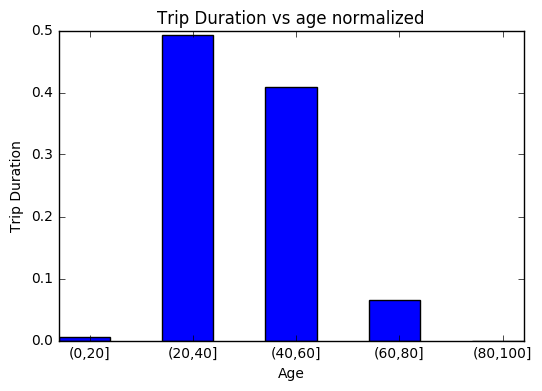

In [213]:
mean_duration_normalized=np.array([0.0,0.0,0.0,0.0,0.0])
for i in range (0,4):
    mean_duration_normalized[i]=df.loc[df['age_range'] == "(%s, %s]" %(20*i,20*i+20), 'tripduration_normalized'].sum()
x = np.arange(5)
y = mean_duration_normalized
ax = plt.subplot(111)
ax.bar(x, y, width=0.5)
#'(0,20]','(20,40]','(40,60]','(60,80]','(80,20]"]
ax.set_xticks(ind + width)
ax.set_xticklabels(('(0,20]','(20,40]','(40,60]','(60,80]','(80,100]'))
plt.xlabel('Age')
plt.ylabel('Trip Duration')

plt.title('Trip Duration vs age normalized')

In [268]:
duration_standard=np.array([0.0,0.0,0.0,0.0,0.0])
duration_count=np.array([0.0,0.0,0.0,0.0,0.0])
duration_error=np.array([0.0,0.0,0.0,0.0,0.0])
duration_sum_normalized=np.array([0.0,0.0,0.0,0.0,0.0])
for i in range (0,4):
    duration_standard[i]=df.loc[df['age_range'] == "(%s, %s]" %(20*i,20*i+20), 'tripduration_normalized'].mean()
    duration_count[i]=df.loc[df['age_range'] == "(%s, %s]" %(20*i,20*i+20), 'tripduration_normalized'].sum()
    duration_error[i]=np.sqrt(duration_standard[i])/duration_count[i]
    duration_sum_normalized[i]=df.loc[df['age_range'] == "(%s, %s]" %(20*i,20*i+20), 'tripduration_normalized'].sum()
duration_error

array([ 0.35771854,  0.00441372,  0.00560786,  0.0370111 ,  0.        ])

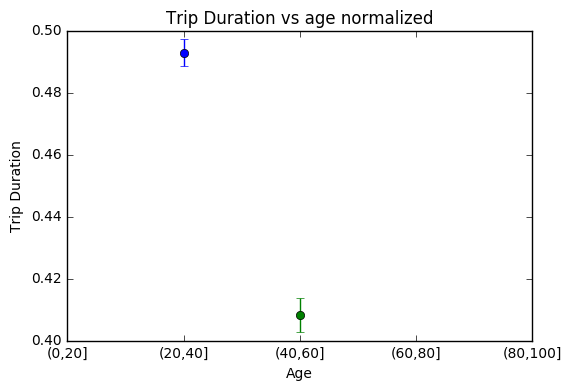

In [274]:
fig = plt.figure()
ax = plt.subplot(111)
x = np.arange(5)
y = duration_error
ax.errorbar(x[1], y=duration_sum_normalized[1],yerr=duration_error[1], fmt='o', label='Above Age 45')
ax.errorbar(x[2], y=duration_sum_normalized[2], yerr=duration_error[2], fmt='o', label='Below Age 45')
#ax.bar(x, y, width=0.5)
#'(0,20]','(20,40]','(40,60]','(60,80]','(80,20]"]
ax.set_xticks(ind)
ax.set_xticklabels(('(0,20]','(20,40]','(40,60]','(60,80]','(80,100]'))
plt.xlabel('Age')
plt.ylabel('Trip Duration')
y = mean_duration_normalized

plt.title('Trip Duration vs age normalized')
plt.show()

In [275]:
print('HYPOTHESIS: Trip duration of people who are in the age (20,40] is longer than those in the age (40,60]')

HYPOTHESIS: Trip duration of people who are in the age (20,40] is longer than those in the age (40,60]


In [276]:
print('The answer is yes with alpha=0.05.')

The answer is yes with alpha=0.05.
